In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report
import joblib
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_white"

In [2]:
data = pd.read_csv("Sample - Superstore.csv", encoding='latin-1') 

In [3]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Data of order date and ship date:--

In [6]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
print(data.isnull().sum())  


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [10]:
data = data.dropna()  
data.fillna(0, inplace=True)  


In [11]:
data['Order month'] = data['Order Date'].dt.month
data['Order year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

In [12]:
data.head(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order month,Order year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


Heatmap Graph :--

In [13]:
corr_matrix = data.select_dtypes(include=[np.number]).corr()

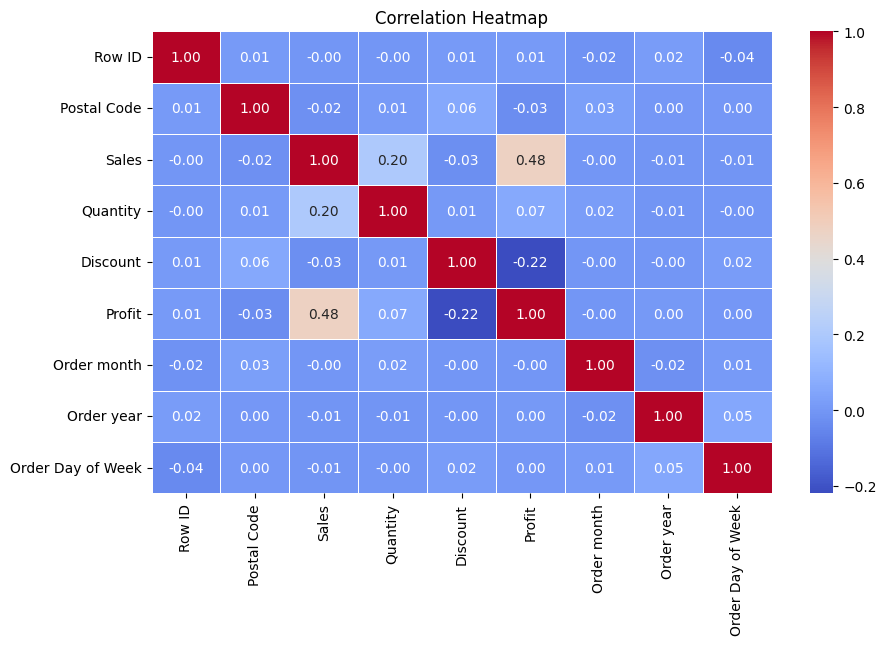

In [14]:
plt.figure(figsize=(10, 6))
corr_matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Monthly Sales analysis:--

In [15]:
sales_by_month = data.groupby('Order month')['Sales'].sum().reset_index()

In [16]:
sales_by_month

,Order month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


In [17]:
fig = px.line(sales_by_month,
              x='Order month',
              y='Sales',
              title='Monthly Sales Analysis')
fig.show()



sales Forcasting for next six month:-

In [18]:
data['Order Date'] = pd.to_datetime(data['Order Date'])


In [19]:
data.set_index('Order Date', inplace=True)

In [20]:
numeric_data = data.select_dtypes(include=['number'])

In [21]:
monthly_sales = numeric_data.resample('ME').sum().reset_index()

In [22]:
monthly_sales['Order month'] = monthly_sales['Order Date'].dt.strftime('%Y-%m')

In [23]:
if len(monthly_sales) < 12:
    print("Not enough data for seasonal forecasting. Using trend-based model instead.")
    model = ExponentialSmoothing(monthly_sales['Sales'], trend='add')
else:
    model = ExponentialSmoothing(monthly_sales['Sales'], trend='add', seasonal='add', seasonal_periods=12)



In [24]:
fit = model.fit()


C:\Users\pauls\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [25]:
future_dates = pd.date_range(start=monthly_sales['Order Date'].max(), periods=7, freq='ME')[1:]
forecasted_sales = fit.forecast(steps=6)

In [26]:
forecast_df = pd.DataFrame({'Order Date': future_dates, 'Sales': forecasted_sales})


In [27]:
monthly_sales['Type'] = 'Actual'
forecast_df['Type'] = 'Forecasted'
combined_sales = pd.concat([monthly_sales[['Order Date', 'Sales', 'Type']], forecast_df])


In [28]:
fig = px.line(combined_sales, x='Order Date', y='Sales', color='Type', 
              title="📈 Sales Forecasting for Next 6 Months",
              labels={'Sales': 'Total Sales ($)', 'Order Date': 'Month'})

fig.show()

Sales by Category:--

In [29]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

In [30]:
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [31]:
fig = px.pie(sales_by_category,
             values='Sales',
             names='Category',
             hole=0.4,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))

fig.show()



Sales Analysis by SubCategory:--

In [32]:
data.head(10)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order month,Order year,Order Day of Week
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,6,2014,0
2014-06-09,7,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,6,2014,0
2014-06-09,8,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,6,2014,0
2014-06-09,9,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,6,2014,0


In [33]:
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()

In [34]:
sales_by_subcategory

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


In [35]:
fig = px.bar(sales_by_subcategory, x= 'Sub-Category', y = 'Sales', title ="Sales analysis by Sub Category")

fig.show()


Monthly profit analysis:--

In [36]:
data.head(5)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order month,Order year,Order Day of Week
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [37]:
Profit_by_month = data.groupby('Order month')['Profit'].sum().reset_index()

In [38]:
Profit_by_month

,Order month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


In [39]:
fig = px.bar(Profit_by_month, x = 'Order month', y = 'Profit', title = 'monthly Profit analysis')

fig.show()




profit by Category:--

In [40]:
Profit_by_Category = data.groupby('Category')['Profit'].sum().reset_index()

In [41]:
Profit_by_Category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


In [42]:
fig = px.pie(Profit_by_Category,
             values='Profit',
             names='Category',
             hole=0.4,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category', title_font=dict(size=24))

fig.show()

Profit by SubCategory:--

In [43]:
Profit_by_SubCategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()

In [44]:
fig = px.bar(Profit_by_SubCategory, x= 'Sub-Category', y = 'Profit', title ="Profit Analysis bny Sub Category")

fig.show()

Sales and Profit by segment :--

In [45]:
Sales_Profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

In [46]:
color_palatte = colors.qualitative.Pastel1

fig = go.Figure()

fig.add_trace(go.Bar(x=Sales_Profit_by_segment['Segment'],
                     y=Sales_Profit_by_segment['Sales'],
                     name='sales',
                     marker_color=color_palatte[0]))

fig.add_trace(go.Bar(x=Sales_Profit_by_segment['Segment'],
                     y=Sales_Profit_by_segment['Profit'],
                     name='Profit',
                     marker_color=color_palatte[1]))

fig.update_layout(title='Sales and Profit Analyis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')

fig.show()

              

Sales to Profit Ratio:--

In [47]:
Sales_Profit_by_Segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
Sales_Profit_by_Segment['Sales_to_Profit_Ratio'] = Sales_Profit_by_Segment['Sales'] / Sales_Profit_by_Segment['Profit']
print(Sales_Profit_by_Segment[['Segment', 'Sales_to_Profit_Ratio']])


       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2016-11-08 to 2017-05-04
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9994 non-null   int64         
 1   Order ID           9994 non-null   object        
 2   Ship Date          9994 non-null   datetime64[ns]
 3   Ship Mode          9994 non-null   object        
 4   Customer ID        9994 non-null   object        
 5   Customer Name      9994 non-null   object        
 6   Segment            9994 non-null   object        
 7   Country            9994 non-null   object        
 8   City               9994 non-null   object        
 9   State              9994 non-null   object        
 10  Postal Code        9994 non-null   int64         
 11  Region             9994 non-null   object        
 12  Product ID         9994 non-null   object        
 13  Category           9994 non-null   object    

In [49]:
data.shape

(9994, 23)

In [50]:
sales_by_City = data.groupby('City')['Sales'].sum().reset_index()

In [51]:
sales_by_City

,City,Sales
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,2729.986
3,Albuquerque,2220.160
4,Alexandria,5519.570
...,...,...
526,Woonsocket,195.550
527,Yonkers,7657.666
528,York,817.978
529,Yucaipa,50.800


In [52]:
fig = px.line(sales_by_City, x = 'City', y = 'Sales', title = 'City sales Analysis')

fig.show()


Top Customers by sales:--

In [53]:
top_customers = data.groupby('Customer Name')['Sales'].sum().reset_index()


In [54]:
top_customers = top_customers.sort_values(by='Sales', ascending=False).head(10)

In [55]:
fig = px.bar(top_customers, 
             x='Customer Name', 
             y='Sales', 
             title="Top 10 Customers by Sales",
             color='Sales',
             text_auto=True)

fig.update_layout(xaxis_title="Customer Name", yaxis_title="Total Sales")
fig.show()

In [56]:
sales_by_Region = data.groupby('Region')['Sales'].sum().reset_index()

In [57]:
sales_by_Region

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


In [58]:
fig = px.pie(sales_by_Region,
             values='Sales',
             names='Region',
             hole=0.4,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales analysis by Region', title_font=dict(size=24))

fig.show()

In [59]:
sales_by_Quantity = data.groupby('Quantity')['Sales'].sum().reset_index()

In [60]:
sales_by_Quantity

,Quantity,Sales
0,1,53251.9345
1,2,289091.4798
2,3,422060.6007
3,4,323670.9944
4,5,415661.6965
5,6,207122.3214
6,7,239908.3659
7,8,117760.1760
8,9,128505.5901
9,10,24056.6640


In [61]:
fig = px.line(sales_by_Quantity, x= 'Quantity', y = 'Sales', title ="Sales and Quantity analysis")

fig.show()

### 👥 Customer Segmentation Using KMeans


In [62]:
customer_data = data.groupby('Customer Name')[['Sales', 'Profit', 'Quantity']].sum().reset_index()
X = customer_data[['Sales', 'Profit', 'Quantity']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

fig = px.scatter_3d(customer_data, x='Sales', y='Profit', z='Quantity', color='Cluster',
                    hover_name='Customer Name', title='Customer Segmentation using KMeans')
fig.show()

In [63]:
features = ['Sales', 'Discount', 'Quantity']
X = data[features]
y = data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("R² Score:", round(r2_score(y_test, y_pred), 3))

R² Score: -0.724


In [64]:
test_input = pd.DataFrame([[200, 0.2, 3]], columns=features)
predicted_profit = lr_model.predict(test_input)[0]
print(f"Predicted Profit: ₹{predicted_profit:.2f}")

Predicted Profit: ₹20.03


In [65]:
data['Is_Profitable'] = (data['Profit'] > 0).astype(int)
X = data[['Sales', 'Quantity', 'Discount']]
y = data['Is_Profitable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       377
           1       0.96      0.97      0.96      1622

    accuracy                           0.94      1999
   macro avg       0.91      0.89      0.90      1999
weighted avg       0.94      0.94      0.94      1999



Time Series analysis:--

In [66]:
example = pd.DataFrame([[200, 3, 0.2]], columns=['Sales', 'Quantity', 'Discount'])
prediction = clf.predict(example)[0]
print("Prediction: Profitable ✅" if prediction == 1 else "Prediction: Not Profitable ❌")

Prediction: Profitable ✅


In [67]:
numeric_data = data.select_dtypes(include=['number'])

In [68]:
monthly_sales = data['Sales'].resample('ME').sum()

In [69]:
decomposition = seasonal_decompose(monthly_sales, model='multiplicative', period=12)

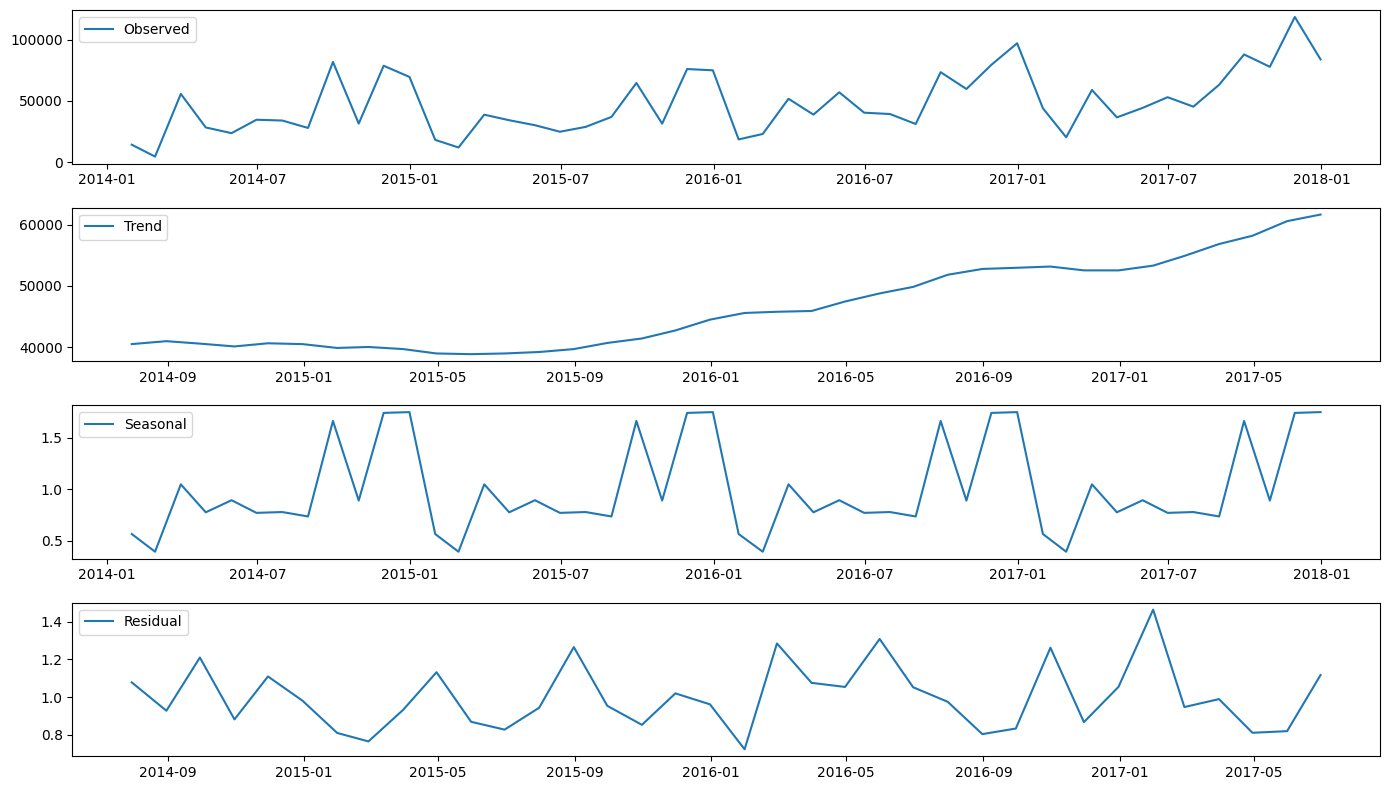

In [70]:
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [71]:
customer_data = data.groupby('Customer Name')[['Sales', 'Profit', 'Quantity']].sum().reset_index()
X = customer_data[['Sales', 'Profit', 'Quantity']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

fig = px.scatter_3d(customer_data, x='Sales', y='Profit', z='Quantity', color='Cluster', hover_name='Customer Name',
                    title='Customer Segmentation using K-Means')
fig.show()

In [72]:
features = ['Sales', 'Discount', 'Quantity']
X = data[features]
y = data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: -0.7240890405096132


In [73]:
data['Is_Profitable'] = (data['Profit'] > 0).astype(int)

X = data[['Sales', 'Quantity', 'Discount']]
y = data['Is_Profitable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       377
           1       0.95      0.97      0.96      1622

    accuracy                           0.94      1999
   macro avg       0.91      0.89      0.90      1999
weighted avg       0.94      0.94      0.94      1999



In [74]:
data.columns = data.columns.str.strip()  # Remove any extra spaces from column names
print(data.columns)  # Check column names


Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order month', 'Order year',
       'Order Day of Week', 'Is_Profitable'],
      dtype='object')


In [75]:
from sklearn.metrics.pairwise import cosine_similarity


In [76]:
user_item_matrix = data.pivot_table(index='Customer Name', columns='Sub-Category', values='Sales', aggfunc='sum').fillna(0)

In [77]:
similarity = cosine_similarity(user_item_matrix)
similarity_df = pd.DataFrame(similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

In [78]:
def recommend_products(customer_name, top_n=3):
    if customer_name not in similarity_df.columns:
        print("Customer not found!")
        return
    similar_customers = similarity_df[customer_name].sort_values(ascending=False)[1:top_n+1]
    recommended_items = user_item_matrix.loc[similar_customers.index].mean().sort_values(ascending=False).head(top_n)
    print(f"Top {top_n} product recommendations for {customer_name}:")
    print(recommended_items)

In [79]:
recommend_products('Sean Miller')

Top 3 product recommendations for Sean Miller:
Sub-Category
Machines       7127.225
Furnishings     328.216
Chairs          295.701
dtype: float64


Churn predection :--

In [80]:
data.columns = data.columns.str.strip()

In [81]:
if 'Order Date' not in data.columns:
    data.reset_index(inplace=True)

In [82]:
latest_date = data['Order Date'].max()

In [83]:
customer_metrics = data.groupby('Customer Name').agg({
    'Order Date': lambda x: (latest_date - x.max()).days,
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Order ID': pd.Series.nunique
}).rename(columns={
    'Order Date': 'Recency',
    'Sales': 'Monetary',
    'Quantity': 'Quantity',
    'Order ID': 'Frequency'
}).reset_index()


In [84]:
customer_metrics['Churn'] = ((customer_metrics['Recency'] > 180) | 
                             (customer_metrics['Monetary'] < 200)).astype(int)

In [85]:
X = customer_metrics[['Recency', 'Monetary', 'Quantity', 'Frequency']]
y = customer_metrics['Churn']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

churn_model = RandomForestClassifier()
churn_model.fit(X_train, y_train)

print("Churn Prediction Accuracy:", churn_model.score(X_test, y_test))
print("Churn Prediction Accuracy:", churn_model.score(X_test, y_test))

Churn Prediction Accuracy: 1.0
Churn Prediction Accuracy: 1.0


In [87]:
example = pd.DataFrame([[120, 300, 5, 4]], columns=X.columns)
prediction = churn_model.predict(example)[0]
print("Likely to Churn ❌" if prediction == 1 else "Likely to Stay ✅")

Likely to Stay ✅


In [88]:
from sklearn.ensemble import RandomForestRegressor


In [89]:
df = pd.read_csv("Sample - Superstore.csv", encoding='latin-1')

In [90]:
df = df.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name'])

In [91]:
df = pd.get_dummies(df, drop_first=True)

In [92]:
X = df.drop("Sales", axis=1)
y = df["Sales"]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [95]:
from sklearn.ensemble import RandomForestRegressor


In [96]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [97]:
import joblib

In [98]:
joblib.dump(model, "sales_prediction_model.pkl")

['sales_prediction_model.pkl']

In [99]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [100]:
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

In [101]:
print("✅ Model, Scaler, and Feature Columns saved successfully.")

✅ Model, Scaler, and Feature Columns saved successfully.


In [102]:
joblib.dump(model, "sales_prediction_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and Scaler saved successfully.")

✅ Model and Scaler saved successfully.
